In [ ]:
# Workflow
# Example of a torch project

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# 1: Data (how to prepare and load data)
# Get data in numerical representation (into tensors)


# 2: Build the model

In [ ]:
X = torch.arange(0, 30)
Y = torch.arange(30, 60)
# Y = a + bX -> a = 30 and b = 1 linear regression

In [ ]:
plt.plot(X, Y)

In [ ]:
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [ ]:
weight = 1
bias = 30

X = torch.arange(0, 30).unsqueeze(dim=1)
X

In [ ]:
Y = weight * X + bias
Y

In [ ]:
fig, ax = plt.subplots()
ax.plot(X.squeeze(), Y.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [ ]:
# Splitting data training set, validation set, test set
weight = 0.01
bias = 0.3
SAMPLES = 1000

X = torch.arange(0, SAMPLES/1000, 1 / 1000).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

In [ ]:
fig, ax = plt.subplots()
ax.plot(X_train.squeeze(), Y_train.squeeze())
ax.set(xlabel="X", ylabel="Y", title="Regression Line: Y = a + bX")
ax.grid()
plt.show()

In [ ]:
def pp(train_data, train_labels, test_data, test_labels, predictions = None):
    plt.figure(figsize=(10, 10))
    
    # plotting the train and test
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

    # predictions
    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
    plt.legend(prop={"size" : 14})

In [ ]:
pp(X_train, Y_train, X_test, Y_test)

In [ ]:

pp(X_train, Y_train, X_test, Y_test, Y_test)

In [ ]:
# Splitting data training set, validation set, test set
weight = 0.01
bias = 0.30
SAMPLES = 1000

X = torch.arange(0, SAMPLES/1000, 1/1000).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

In [ ]:
# Now lets create the predictions
# Create the model with linear regression
class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
    def __init__(self):
        super().__init__()
        # This are the parameters that the model wants to learn
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    # Forward functions define the computations of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# The goal of the model is to predict the correct weight and bias
# Il will adjust the weight and bias to get it correct
# With liear is using gradient decent to get to the ideal values

In [ ]:
# !! Now we need to train the model with the data !!
# l_model = LinearRegressionModel()

#predictions = l_model.forward(X_train)
# Print
# pp(X_train, Y_train, X_test, Y_test, predictions)


In [ ]:
# We want to know wat is insede the module
torch.manual_seed(432)

# Create an instance of the class
model = LinearRegressionModel()
params = list(model.parameters())
print(params)
(model.state_dict())

In [ ]:
# What we want is that model.state_dict() is as close as possible as a and b of Y = a + bX

In [ ]:
# Without training we can try to predict Y_test

# Inference (making a prediction !)

In [ ]:
with torch.inference_mode():
    predictions = model(X_test)

In [ ]:
print(predictions[10: 20])

In [ ]:
pp(X_train, Y_train, X_test, Y_test, predictions)

In [ ]:
# This graph is not good, as we can see the prediction is random# Splitting data training set, validation set, test set
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

# Training and test set
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test= X[train_split:], Y[train_split:]

# model = LinearRegressionModel()
# with torch.inference_mode():
#     predictions = model(X_test)

# We can mesure the model goodness using a loss function
# lossf = nn.L1Loss()
# output = lossf(predictions, Y_test)
# print(f"Loss: {output}")

# print(f"LossBack: {output.backward()}")

# Training (lets make it learn from data)

In [ ]:
# The optimizer will use a loss functino to understand how faroff of the goal it will be
# The optimizer will modify the parameters to lower the loss 

# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.001 # learning rate, a metaparameter
) 

# Optimizers and losses will come with experience

# Training loop and Testing loop
# 0. loop through the data
# 1. forward pass (data moving through the graph, make predictions)
# 2. Calculate the loss
# 3. Loss backward - move from the output to input to calculate gradients of the module
# 4. Optimization step:  gradient decent modify the weights
#   - this will adjust the parameters to reduce the loss

In [ ]:
# Training
torch.manual_seed(41)
model = LinearRegressionModel()
print(list(model.parameters()))
# Lets setup an optimizer
loss_func = nn.L1Loss() # We need the loss
# We need to chose the optimizer
optimizer = torch.optim.SGD( # Stocastic gradient decent
    params = model.parameters(),  # the parameters to optimize
    lr = 0.001 # learning rate, a metaparameter
)

epochs = 5000 # Hyperparameter to know how many loops
for epoch in range(epochs):
    # Set to training mode (for this we need grad=True)
    model.train() # Set the model to allow for gradient decent

    # Farward pass
    new_y_pred = model(X_train)

    # Calculate Loss (pred, real)
    loss = loss_func(new_y_pred, Y_train)
    l = loss
    # Optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Optimize
    optimizer.step()

    # Testing
    model.eval()

    # Print dict
    print(f"weight: {model.state_dict()['weight'].item()}, bias : {model.state_dict()['bias'].item()}, loss: {l}")

In [ ]:
# Lets see
print(list(model.parameters()))
with torch.inference_mode():
    predictions = model(X_test)
pp(X_train, Y_train, X_test, Y_test, predictions)

In [ ]:
import torch 
import torch.nn as nn

def run(device : str, epochs = 10000, weight = 1, bias = 30, SAMPLES = 1000, seed = 43252):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(seed)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.001 # learning rate, a metaparameter
    )

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"weight: {model.state_dict()['weight'].item()}, bias : {model.state_dict()['bias'].item()}, loss: {l}")

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)


In [ ]:
%%time
run("cpu")

In [ ]:
%%time
run("cuda")

In [ ]:
%%time
run("cuda")

In [ ]:
run(device = "cpu",  epochs = 10000, weight = 0.45223, bias = 0.432, SAMPLES = 1000, seed = 43252)

In [ ]:
import torch 
import torch.nn as nn

def run(device : str, epochs = 10000, weight = 1, bias = 30, SAMPLES = 1000, seed = 43252):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(seed)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.001 # learning rate, a metaparameter
    )

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_func(test_pred, Y_test)

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"epoch: {epoch} | weight: {model.state_dict()['weight'].item()}, bias: {model.state_dict()['bias'].item()}, loss: {l}, Tloss: {test_loss}")

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)

In [ ]:
run("cpu")

In [ ]:
for i in range(0, 10):
    run(device = "cuda", epochs = 200, weight = 1, bias = 30, SAMPLES = 500, seed = i)
    input()

In [29]:
import torch 
import torch.nn as nn

def run(device : str, epochs = 10000, weight = 1, bias = 30, SAMPLES = 1000, seed = 43252):
    torch.set_default_device(device)

    # Create the model with linear regression
    class LinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weight * x + self.bias

    # Plotting
    def pp(train_data, train_labels, test_data, test_labels, predictions = None):
        train_data = train_data.cpu()
        train_labels = train_labels.cpu()
        test_data = test_data.cpu()
        test_labels = test_labels.cpu()

        plt.figure(figsize=(10, 10))
    
        # plotting the train and test
        plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
        plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

        # predictions
        if predictions != None:
            predictions = predictions.cpu()
            plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
        plt.legend(prop={"size" : 14})

    X = torch.arange(0, SAMPLES).unsqueeze(dim=1)
    Y = weight * X + bias

    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    torch.manual_seed(seed)
    model = LinearRegressionModel()
    print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.0001 # learning rate, a metaparameter
    )

    # Saving loss and epoch
    saved_epochs = []
    saved_loss = []
    saved_tloss = []

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_func(test_pred, Y_test)

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"epoch: {epoch} | weight: {model.state_dict()['weight'].item()}, bias: {model.state_dict()['bias'].item()}, loss: {l}, Tloss: {test_loss}")

        saved_epochs.append(epoch)
        saved_loss.append(loss.item())
        saved_tloss.append(test_loss.item())

    # Lets see
    print(list(model.parameters()))
    with torch.inference_mode():
        predictions = model(X_test)
    pp(X_train, Y_train, X_test, Y_test, predictions)

    plt.figure(figsize=(10, 10))
    plt.plot(saved_epochs, saved_loss)
    plt.plot(saved_epochs, saved_tloss)
    

[Parameter containing:
tensor([-0.6014], requires_grad=True), Parameter containing:
tensor([-1.0122], requires_grad=True)]
epoch: 0 | weight: -0.5814428329467773, bias: -1.0121097564697266, loss: 350.4900817871094, Tloss: 741.8707275390625
epoch: 15 | weight: -0.2821929156780243, bias: -1.01060950756073, loss: 290.7882080078125, Tloss: 607.3563232421875
epoch: 30 | weight: 0.017057107761502266, bias: -1.0091092586517334, loss: 231.0863494873047, Tloss: 472.8419494628906
epoch: 45 | weight: 0.3163071274757385, bias: -1.0076090097427368, loss: 171.38446044921875, Tloss: 338.32757568359375
epoch: 60 | weight: 0.6155570149421692, bias: -1.0061087608337402, loss: 111.6825942993164, Tloss: 203.81324768066406
epoch: 75 | weight: 0.914806604385376, bias: -1.0046085119247437, loss: 51.980812072753906, Tloss: 69.29904174804688
epoch: 90 | weight: 1.108936071395874, bias: -1.0034102201461792, loss: 12.867609977722168, Tloss: 17.963346481323242
epoch: 105 | weight: 1.1096673011779785, bias: -1.002

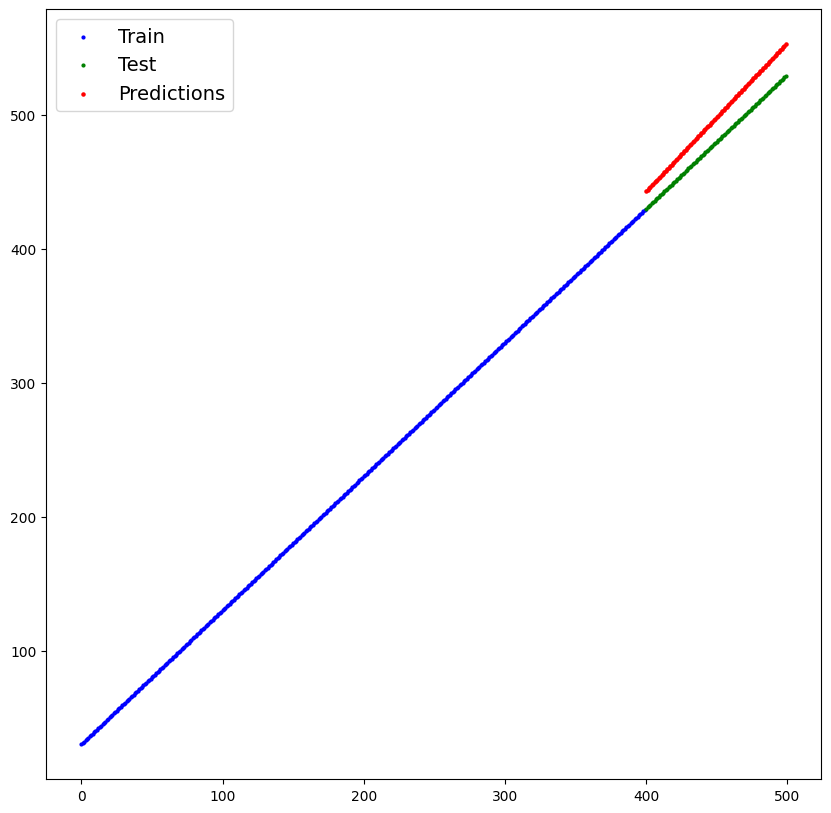

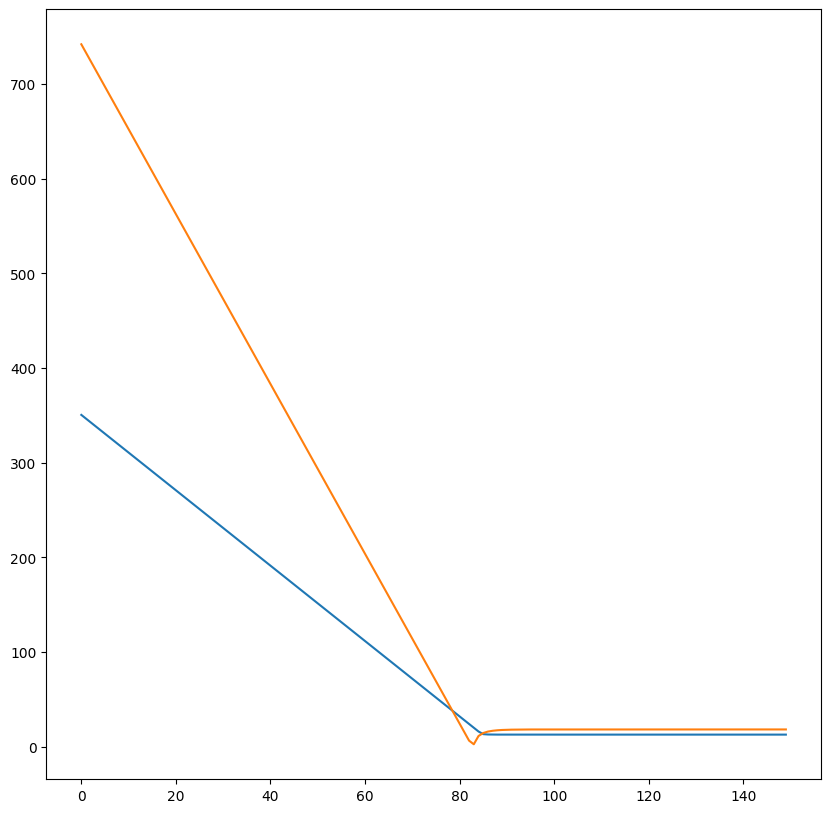

In [30]:
run(device = "cpu", epochs = 150, weight = 1, bias = 30, SAMPLES = 500, seed = 10)

In [41]:
# Saving a model after training
# You can do it in tree methods
# torch.save() in python pickele formats, serializing and desirializing
# torch.load() to load
# torch.nn.Module.load_state_dict() - to save the state dict

# Create the model
model_to_save = LinearRegressionModel()

from pathlib import Path

# Create a directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "03_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# Save the model as state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(model.state_dict(), MODEL_SAVE_PATH)

# Loading
modelcopy_sd = torch.load(MODEL_SAVE_PATH, weights_only=True)
modelcopy_sd
modelcopy = LinearRegressionModel()
modelcopy.load_state_dict(modelcopy_sd)
modelcopy.eval()
print(list(modelcopy.parameters()))

Saving the model to: models/03_workflow_model.pth
[Parameter containing:
tensor([0.7004], requires_grad=True), Parameter containing:
tensor([0.2994], requires_grad=True)]


In [91]:
import torch 
import torch.nn as nn

## Example:
## Y = X1 * 3 + X2 * 6 * X3 * 4 + 10
## X1 X2 X3
## 1  2  3
## 2  4  6
## 4  8  12
## 5  9  14
## 8  10  16

## a
## 3
## 6 
## 4

## b
## 10

X = torch.tensor([
    [1, 2, 3],
    [2, 4, 6],
    [4, 8, 12],
    [5, 9, 14],
    [8, 10, 16]
])

a = torch.tensor([
    [3], 
    [6], 
    [4]
])

b = torch.tensor(10)

# print(X.size())
# print(a.size())
# print(X)
# print(a)

Y = X @ a + b
# print(Y)

# Y = X1a1 + X2a2 + X3a3 + ... + XNaN + b
# len(a) is the number of regressors
# b is the intercept
def runMLin(epochs = 10000, NRegressors = 3, SAMPLES = 1000, seed = 43252):
    torch.set_default_device("cpu")

    # Create the model with linear regression
    class MultiLinearRegressionModel(nn.Module): # use nn.Module to create our modules
        def __init__(self):
            super().__init__()
            # This are the parameters that the model wants to learn
            self.a = nn.Parameter(torch.randn(size=(NRegressors, 1), requires_grad=True, dtype=torch.float))
            self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
        # Forward functions define the computations of the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return x @ a + self.bias

    # Create X and Y 
    torch.manual_seed(seed)
    X = torch.arange(SAMPLES, dtype=torch.float)
    for i in range(0, NRegressors-1):
        X = torch.vstack((X, torch.arange(SAMPLES, dtype=torch.float)))
    X = torch.transpose(X, 0, 1)
    a = torch.rand(size = (NRegressors, 1), dtype=torch.float)
    b = torch.rand(1)

    # Create equation
    Y = X @ a + b
    # print(f"Y: {Y}")

    # Device data
    # Training and test set
    train_split = int(0.8 * len(X))
    X_train, Y_train = X[:train_split], Y[:train_split]
    X_test, Y_test= X[train_split:], Y[train_split:]

    # Training
    model = MultiLinearRegressionModel()
    # print(list(model.parameters()))
    # Lets setup an optimizer
    loss_func = nn.L1Loss() # We need the loss
    # We need to chose the optimizer
    optimizer = torch.optim.SGD( # Stocastic gradient decent
        params = model.parameters(),  # the parameters to optimize
        lr = 0.0001 # learning rate, a metaparameter
    )

    # Saving loss and epoch
    saved_epochs = []
    saved_loss = []
    saved_tloss = []

    # Hyperparameter to know how many loops
    for epoch in range(epochs):
        # Set to training mode (for this we need grad=True)
        model.train() # Set the model to allow for gradient decent

        # Farward pass
        new_y_pred = model(X_train)

        # Calculate Loss (pred, real)
        loss = loss_func(new_y_pred, Y_train)
        l = loss
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        # Optimize
        optimizer.step()

        # Testing
        model.eval()

        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_func(test_pred, Y_test)

        # Print dict
        if epoch % int(epochs / 10) == 0: 
            print(f"epoch: {epoch} | a: {model.state_dict()['a']}, bias: {model.state_dict()['bias'].item()}, loss: {l}, Tloss: {test_loss}")

        # saved_epochs.append(epoch)
        # saved_loss.append(loss.item())
        # saved_tloss.append(test_loss.item())
    
    return model.state_dict()['a'], a

res, actual = runMLin(epochs=10000, NRegressors=2, SAMPLES=1000, seed=3)
print(f"res-actual: \n{res-actual}, \nres: \n{res}, \nactual: \n{actual}")

res, actual = runMLin(epochs=100000, NRegressors=5, SAMPLES=1000, seed=3)
print(f"res-actual: \n{res-actual}, \nres: \n{res}, \nactual: \n{actual}")

epoch: 0 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.44263991713523865, loss: 0.1568978875875473, Tloss: 0.15679931640625
epoch: 1000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.3426531255245209, loss: 0.056909915059804916, Tloss: 0.0568084716796875
epoch: 2000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 3000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 4000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 5000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 6000 | a: tensor([[0.2453],
        [1.1186]]), bias: 0.2858606278896332, loss: 8.320815686602145e-05, Tloss: 1.52587890625e-05
epoch: 7000 | a: tensor([[0.2453],
        [1.1186]]), bias: 

In [132]:
# Putting all togher
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

print(f"Torch: version {torch.__version__}")
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)
!nvidia-smi

Torch: version 2.7.1
zsh:1: command not found: nvidia-smi


In [230]:
# Create the data
S = 1000
X = torch.rand(size = (1000, 1), dtype=torch.float)
print(f"X.size(): {X.size()}, {X[:4]}")
w = 2
b = 4
Y = X * w + b
print(f"Y.size(): {Y.size()}, {Y[:4]}")

X.size(): torch.Size([1000, 1]), tensor([[0.4716],
        [0.8738],
        [0.7403],
        [0.7840]])
Y.size(): torch.Size([1000, 1]), tensor([[4.9432],
        [5.7475],
        [5.4805],
        [5.5680]])


In [231]:
# Splitting
split_index = int(0.8 * len(X))
X_train = X[:split_index]
Y_train = Y[:split_index]
X_test = X[split_index:]
Y_test = Y[split_index:]

In [232]:
# Plotting
def pp(train_data, train_labels, test_data, test_labels, predictions = None):
    train_data = train_data.cpu()
    train_labels = train_labels.cpu()
    test_data = test_data.cpu()
    test_labels = test_labels.cpu()

    plt.figure(figsize=(10, 10))
    
    # plotting the train and test
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")

    # predictions
    if predictions != None:
        predictions = predictions.cpu()
        plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")
    
    plt.legend(prop={"size" : 14})

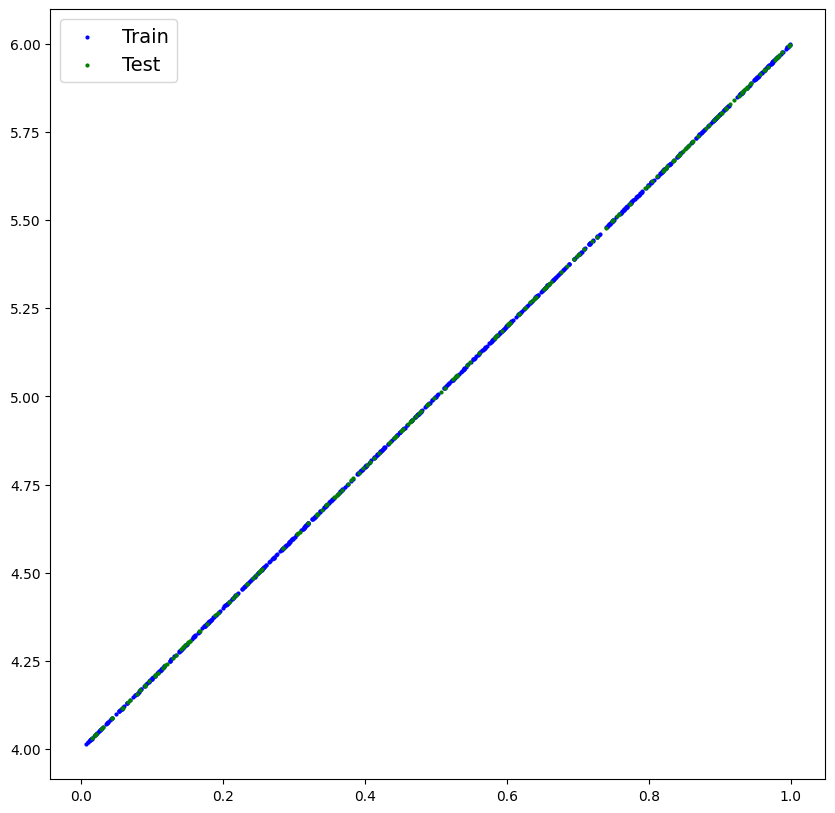

In [233]:
# Plot the data
pp(X_train, Y_train, X_test, Y_test, None)

In [234]:
# Model
class LR(nn.Module):
    def __init__(self):
        super().__init__()

        self.w = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x : torch.tensor):
        return self.w * x + self.b

# Better model
# This is a fully connected layer
class LR_better(nn.Module):
    def __init__(self):
        super().__init__()

        # Here i can crate a linear layer automatically
        self.ll = (nn.Linear(in_features=1, out_features=1))

    def forward(self, x : torch.tensor):
        return self.ll(x) # as doc: https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html
    

Model State dict: OrderedDict({'ll.weight': tensor([[0.8015]]), 'll.bias': tensor([0.4927])})
epoch: 0 | l: 4.120667934417725 | tl: 4.126440525054932 | p: OrderedDict({'ll.weight': tensor([[0.8020]]), 'll.bias': tensor([0.4937])})
epoch: 1000 | l: 2.858720064163208 | tl: 2.861487627029419 | p: OrderedDict({'ll.weight': tensor([[1.3138]]), 'll.bias': tensor([1.4937])})
epoch: 2000 | l: 1.5968126058578491 | tl: 1.5965750217437744 | p: OrderedDict({'ll.weight': tensor([[1.8256]]), 'll.bias': tensor([2.4937])})
epoch: 3000 | l: 0.3349252939224243 | tl: 0.3316822946071625 | p: OrderedDict({'ll.weight': tensor([[2.3374]]), 'll.bias': tensor([3.4937])})
epoch: 4000 | l: 0.0775858461856842 | tl: 0.08117153495550156 | p: OrderedDict({'ll.weight': tensor([[2.3074]]), 'll.bias': tensor([3.8221])})
epoch: 5000 | l: 0.02992924489080906 | tl: 0.03128177672624588 | p: OrderedDict({'ll.weight': tensor([[2.1185]]), 'll.bias': tensor([3.9314])})
epoch: 6000 | l: 0.00037433503894135356 | tl: 0.0008876014

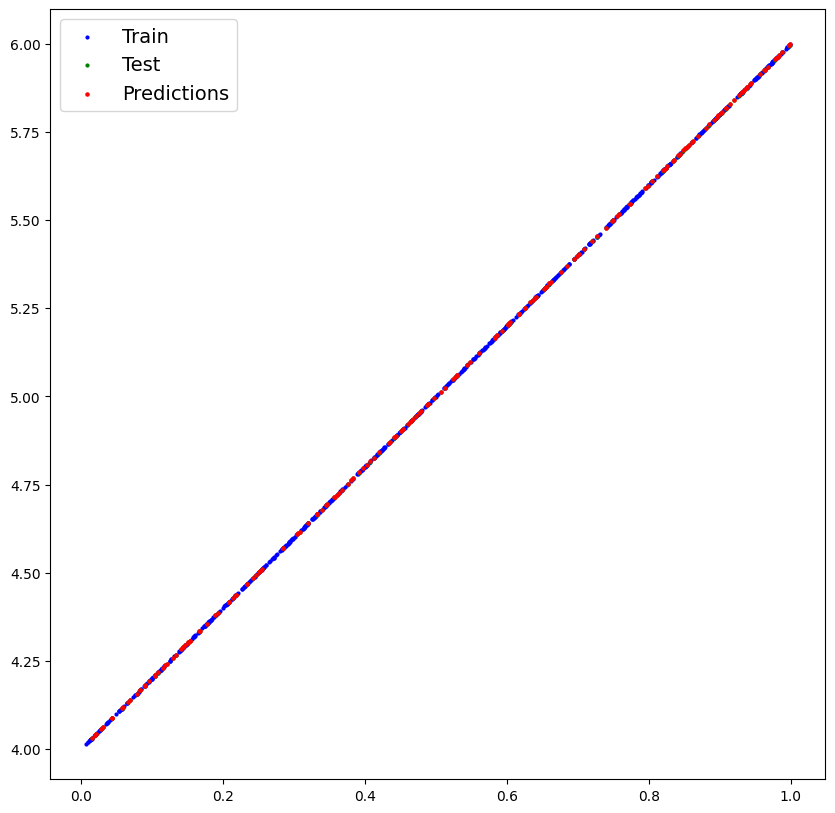

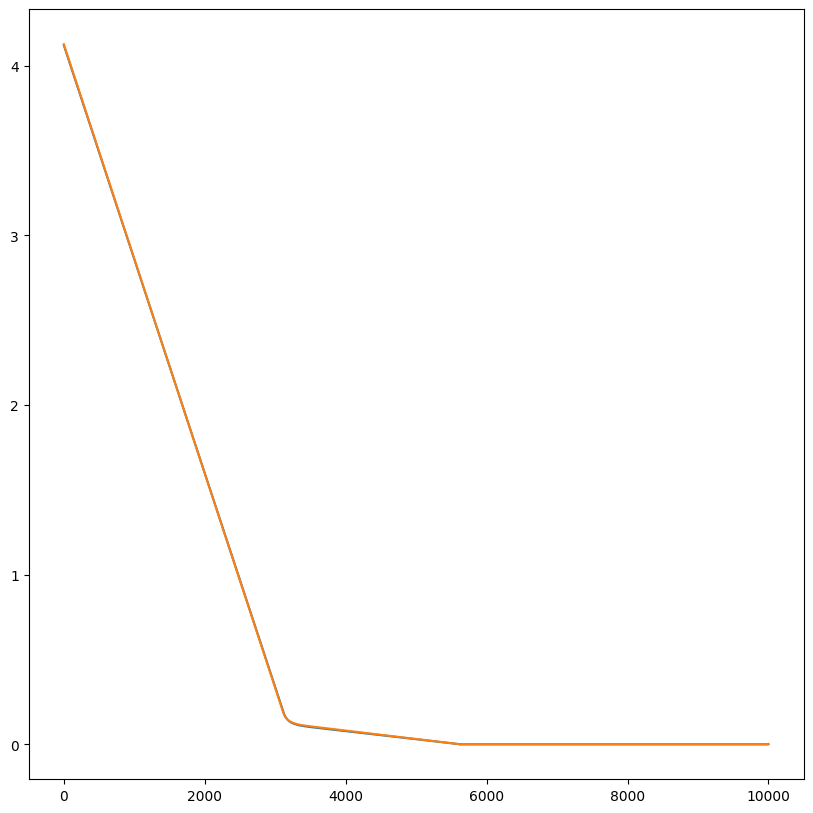

In [238]:
# Create the training loop
torch.manual_seed(30)
model = LR_better()
print(f"Model State dict: {model.state_dict()}")

# Loss and Optimization
import torch.optim as opt
loss_f = nn.L1Loss()
# Using stocasting gradient decent
optimizer = opt.SGD(params = model.parameters(), lr = 0.001)

saved_epochs = []
saved_loss = []
saved_tloss = []

# Training loop
epochs = 10000
for ep in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train)

    # Loss 
    loss = loss_f(y_pred, Y_train)

    # Zero
    optimizer.zero_grad()

    # Perform backward
    loss.backward()

    # Optimize
    optimizer.step()

    # Test
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_f(test_pred, Y_test)

    if (ep % (epochs / 10)) == 0:
        print(f"epoch: {ep} | l: {loss} | tl: {test_loss} | p: {model.state_dict()}")

    saved_epochs.append(ep)
    saved_loss.append(loss.item())
    saved_tloss.append(test_loss.item())

with torch.inference_mode():
    predictions = model(X_test)
pp(X_train, Y_train, X_test, Y_test, predictions)

# Viz
plt.figure(figsize=(10, 10))
plt.plot(saved_epochs, saved_loss)
plt.plot(saved_epochs, saved_tloss)

Epoca [500/10000], Loss: 29.5514, TLoss: 29.0809
Epoca [1000/10000], Loss: 23.3467, TLoss: 22.9163
Epoca [1500/10000], Loss: 17.1419, TLoss: 16.7516
Epoca [2000/10000], Loss: 10.9372, TLoss: 10.5869
Epoca [2500/10000], Loss: 6.3168, TLoss: 6.0375
Epoca [3000/10000], Loss: 4.4452, TLoss: 4.2790
Epoca [3500/10000], Loss: 3.6548, TLoss: 3.6397
Epoca [4000/10000], Loss: 3.2810, TLoss: 3.3532
Epoca [4500/10000], Loss: 3.0133, TLoss: 3.1280
Epoca [5000/10000], Loss: 2.7682, TLoss: 2.8900
Epoca [5500/10000], Loss: 2.5261, TLoss: 2.6430
Epoca [6000/10000], Loss: 2.2844, TLoss: 2.3911
Epoca [6500/10000], Loss: 2.0428, TLoss: 2.1381
Epoca [7000/10000], Loss: 1.8011, TLoss: 1.8851
Epoca [7500/10000], Loss: 1.5595, TLoss: 1.6321
Epoca [8000/10000], Loss: 1.3179, TLoss: 1.3792
Epoca [8500/10000], Loss: 1.0762, TLoss: 1.1262
Epoca [9000/10000], Loss: 0.8346, TLoss: 0.8732
Epoca [9500/10000], Loss: 0.5929, TLoss: 0.6202
Epoca [10000/10000], Loss: 0.3513, TLoss: 0.3673
linear.weight: [[28.606487]]
lin

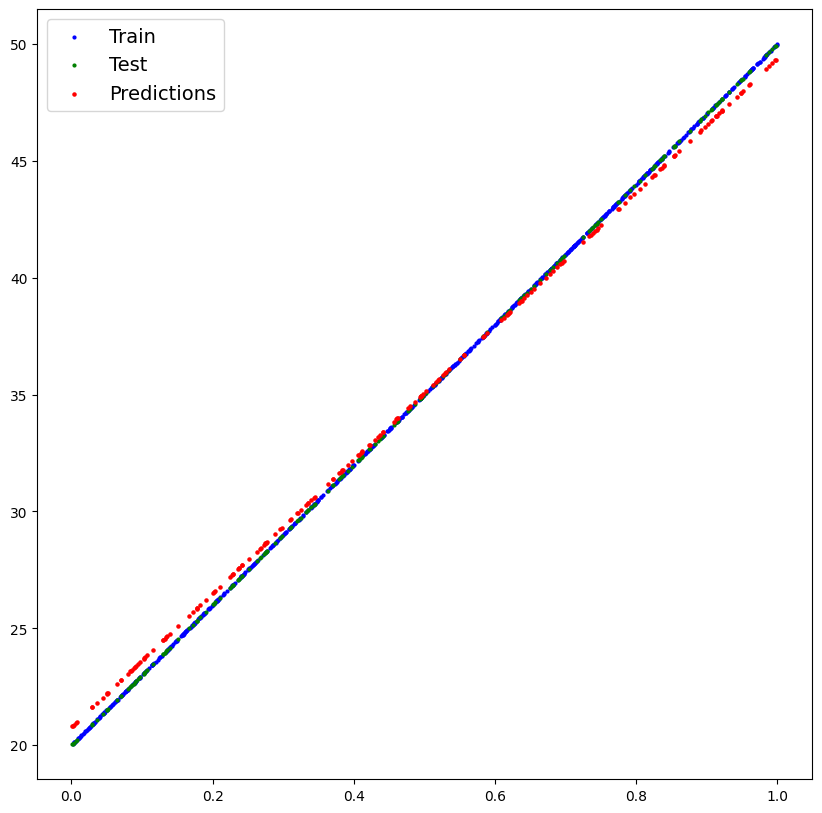

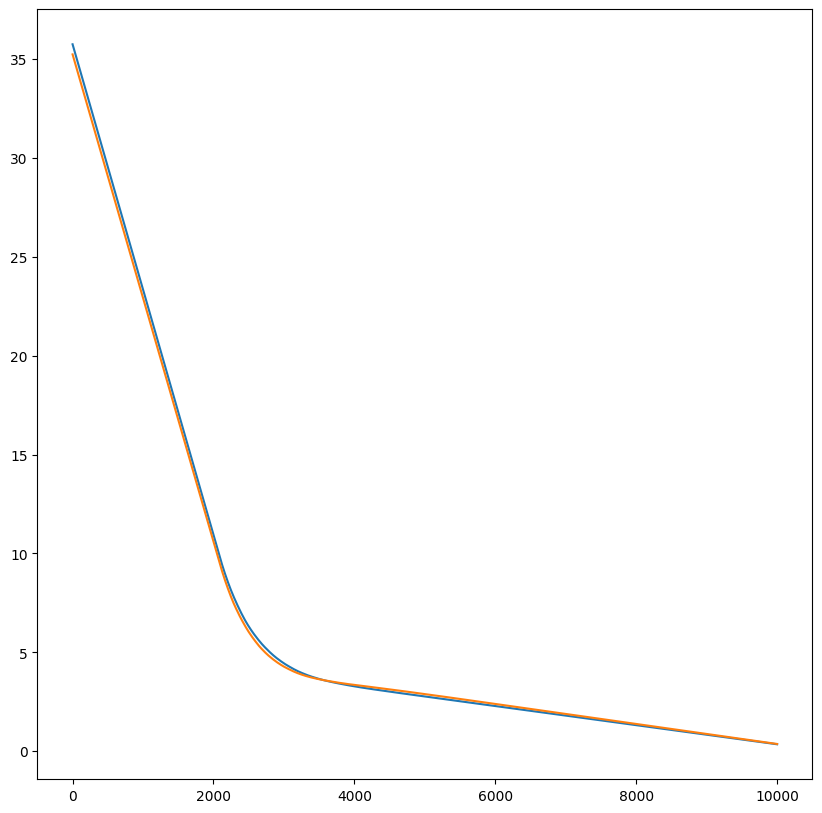

In [237]:
# chat gpt test
import torch
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(2)

# Dati di esempio (input x e target y)
#x = torch.arange(1000, dtype=torch.float).unsqueeze(dim=1)
x = torch.rand(size = (1000, 1), dtype=torch.float)
y = 30 * x + 20 # y = 2 * x + 0

# Splitting
split_index = int(0.8 * len(x))
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

# Definizione del modello lineare
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # un input, un output

    def forward(self, x):
        return self.linear(x)

# Istanziazione del modello
model = LinearModel()

# Definizione della loss function e dell'ottimizzatore
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

saved_epochs = []
saved_loss = []
saved_tloss = []

# Addestramento
epochs = 10000
for epoch in range(epochs):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = criterion(test_pred, y_test)

    if (epoch + 1) % int(epochs / 20) == 0:
        print(f'Epoca [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, TLoss: {test_loss.item():.4f}')
   
    saved_epochs.append(epoch)
    saved_loss.append(loss.item())
    saved_tloss.append(test_loss.item())

# Valori appresi
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data.numpy()}')

# Show
with torch.inference_mode():
    test_pred = model(x_test)

# Viz
pp(x_train, y_train, x_test, y_test, test_pred)

plt.figure(figsize=(10, 10))
plt.plot(saved_epochs, saved_loss)
plt.plot(saved_epochs, saved_tloss)
 